In [12]:
# Question 4.2 a
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X= iris.data
y=iris.target

# a) randomly split data into train, validation and test
X_train_o, X_test, y_train_o, y_test = train_test_split(X, y, test_size=0.25, shuffle = True)

X_train, X_val, y_train, y_val = train_test_split(X_train_o, y_train_o, test_size=0.34, shuffle = True) # 0.34 x 0.75 = 0.25

print("length of tain:" + str(len(X_train)), "length of val:" + str(len(X_val)),"length of test:" + str(len(X_test)))

#Question about the randomly chosen

"""

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)



"""


"""

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5
ratio_val = 0.25
ratio_test = 0.25

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(
    x, y, test_size=test_ratio)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)
Since the remaining dataset is reduced after the first split, new ratios with respect to the reduced dataset must be calculated by solving the equation:

Rremaining⋅Rnew=Rold



"""


length of tain:73 length of val:39 length of test:38


'\n\n# Defines ratios, w.r.t. whole dataset.\nratio_train = 0.5\nratio_val = 0.25\nratio_test = 0.25\n\n# Produces test split.\nx_remaining, x_test, y_remaining, y_test = train_test_split(\n    x, y, test_size=test_ratio)\n\n# Adjusts val ratio, w.r.t. remaining dataset.\nratio_remaining = 1 - ratio_test\nratio_val_adjusted = ratio_val / ratio_remaining\n\n# Produces train and val splits.\nx_train, x_val, y_train, y_val = train_test_split(\n    x_remaining, y_remaining, test_size=ratio_val_adjusted)\nSince the remaining dataset is reduced after the first split, new ratios with respect to the reduced dataset must be calculated by solving the equation:\n\nRremaining⋅Rnew=Rold\n\n\n\n'

[0.9230769230769231, 0.9487179487179487, 0.9487179487179487]
[0.07692307692307693, 0.05128205128205128, 0.05128205128205128]


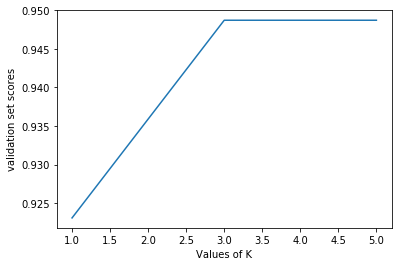

In [13]:
# 4.2 (b)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#k_range = range(1,25)
import numpy as np
k_range = [1,3,5]
#scores = {}
score_list = []
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    score_list.append(metrics.accuracy_score(y_val,y_pred))
print(score_list)
import matplotlib.pyplot as plt
plt.plot(k_range,score_list )
plt.xlabel("Values of K")
plt.ylabel("validation set scores")

error_rate = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))
print(error_rate)

In [14]:
# 4.2 c

from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, param_grid, scoring = 'accuracy')
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)



0.9723809523809525
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy is: 0.9736842105263158
error is: 0.02631578947368418


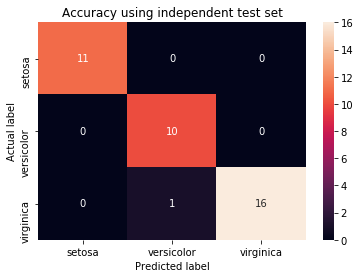

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        17

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [17]:
# 4.2 d generalisation error

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_o,y_train_o)
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Accuracy is:",accuracy_score(y_test, y_pred))
print("error is:", (1-accuracy_score(y_test, y_pred)))
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using independent test set'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred))


In [ ]:
# 4.3 e

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X= iris.data
y=iris.target

# a) randomly split data into train, validation and test
X_train_o, X_test, y_train_o, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train_o, y_train_o, test_size=0.34, shuffle=True)

#model selection
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X_train_o, y_train_o, cv=5, scoring='accuracy').mean())

#.94

logreg = LogisticRegression()
print(cross_val_score(logreg, X_train_o, y_train_o, cv=5, scoring='accuracy').mean())

#.96

#Evaluation

#model selection
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean())

#.94

logreg = LogisticRegression()
print(cross_val_score(logreg, X_test, y_test, cv=5, scoring='accuracy').mean())



# https://www.ritchieng.com/machine-learning-cross-validation/
knn.fit(X_train_o,y_train_o)
y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

logreg.fit(X_train_o,y_train_o)
y_pred_logreg = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_logreg))




for K = 1 error is 0.06284584980237154
for K = 3 error is 0.06284584980237154
for K = 5 error is 0.0541501976284585
Average error of 5-fold CV is : [0.0541501976284585]
Generalisation error on test set with 5 fold CV and k = 3 is 0.033333333333333326
Generalisation error on test set wihtout CV is 0.052631578947368474


NameError: name 'plt' is not defined

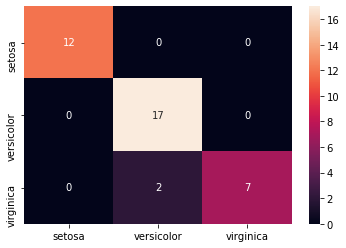

In [9]:
# 4.3 e

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
iris = datasets.load_iris()
X= iris.data
y=iris.target

# a) randomly split data into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

#model selection
for i in (1,3,5):
    sc= []
    knn = KNeighborsClassifier(n_neighbors=i)
    print("for K =",i,"error is", (1-cross_val_score(knn, X_train, y_train, cv=5)).mean())
    sc.append((1-cross_val_score(knn, X_train, y_train, cv=5)).mean())
print("Average error of 5-fold CV is :" ,sc)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
#print("Accuracy on overall test set is:", metrics.accuracy_score(y_test,y_pred_knn))
print("Generalisation error on test set with 5 fold CV and k = 3 is",(1-cross_val_score(knn, X, y, cv=5)).mean())
print("Generalisation error on test set wihtout CV is",(1-metrics.accuracy_score(y_test,y_pred_knn)))
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using independent test set'.format(accuracy_score(y_test, y_pred_knn)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred_knn))



